In [ ]:
import numpy as np
import pandas as pd
import glob as gb
import torch as tc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder    #The LabelEncoder is used for encoding categorical features into numerical values.
from sklearn.linear_model import LinearRegression
import seaborn as sns    #Seaborn provides a more streamlined way to create advanced visualizations than Matplotlib.
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score   #used for evaluating the performance of regression models
import copy, math


from sklearn.impute import SimpleImputer   #used for imputing missing values in datasets.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler  #used for scaling features to a given range, usually between 0 and 1


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB  #used for building Naive Bayes models


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO - CAR DETAILS FROM CAR DEKHO.csv')
data.head(7)

name  year  selling_price  km_driven    fuel  \
0              Maruti 800 AC  2007          60000    70000.0  Petrol   
1                        NaN  2007         135000    50000.0  Petrol   
2       Hyundai Verna 1.6 SX  2012         600000   100000.0  Diesel   
3     Datsun RediGO T Option  2017         250000    46000.0  Petrol   
4      Honda Amaze VX i-DTEC  2014         450000   141000.0  Diesel   
5       Maruti Alto LX BSIII  2007         140000   125000.0  Petrol   
6  Hyundai Xcent 1.2 Kappa S  2016         550000    25000.0  Petrol   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
5  Individual       Manual   First Owner  
6  Individual       Manual   First Owner

In [ ]:
data.describe()   #It computes several summary statistics, including count, mean, standard deviation, minimum and maximum values, and the quartiles of the data. By default, only the numeric columns are returned, and the non-numeric columns are excluded.

year  selling_price      km_driven
count  4340.000000   4.340000e+03    4245.000000
mean   2013.090783   5.041273e+05   66341.929329
std       4.215344   5.785487e+05   46622.141603
min    1992.000000   2.000000e+04       0.000000
25%    2011.000000   2.087498e+05   33000.000000
50%    2014.000000   3.500000e+05   60000.000000
75%    2016.000000   6.000000e+05   90000.000000
max    2020.000000   8.900000e+06  806599.000000

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4316 non-null   object 
 1   year           4340 non-null   int64  
 2   selling_price  4340 non-null   int64  
 3   km_driven      4245 non-null   float64
 4   fuel           4340 non-null   object 
 5   seller_type    4340 non-null   object 
 6   transmission   4340 non-null   object 
 7   owner          4340 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 271.4+ KB



# **Data Preprocessing**





In [ ]:
data.isna().sum()       #used in Pandas library to count the number of missing values (NaN) in each column of a DataFrame

name             24
year              0
selling_price     0
km_driven        95
fuel              0
seller_type       0
transmission      0
owner             0
dtype: int64

In [ ]:
data.shape

(4340, 8)

In [ ]:
#dropping the rows
data = data.dropna(axis = 0, subset = ['name', 'year','selling_price', 'fuel', 'seller_type', 'transmission','owner'])
print("Shape after dropping:", data.shape)

Shape after dropping: (4316, 8)


In [ ]:
"""data = data.dropna(axis = 1)
print("Shape after dropping:", data.shape)"""

'data = data.dropna(axis = 1)\nprint("Shape after dropping:", data.shape)'

In [ ]:
#imputing missing values


impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(data[['km_driven']])  #it has to be 2D to pass as a dataframe

data['km_driven'] = impute.transform(data[['km_driven']])

<ipython-input-280-9b32cd72aa80>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#Label-> selling price

data['selling_price'].value_counts()

300000     161
250000     125
350000     122
550000     107
600000     103
          ... 
746000       1
1334000      1
811999       1
1331000      1
865000       1
Name: selling_price, Length: 445, dtype: int64

In [ ]:
print(data['selling_price'].min())
print(data['selling_price'].max())

20000
8900000


In [ ]:
bins=[20000,250000,400000,9000000]
labels=['low','medium','high']
data['selling_price']=pd.cut(data['selling_price'], bins, labels=labels)
data['selling_price'].value_counts()

<ipython-input-284-0b6abe50d691>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



high      1916
low       1469
medium     930
Name: selling_price, dtype: int64

In [ ]:
data.head(5)

name  year selling_price  km_driven    fuel seller_type  \
0           Maruti 800 AC  2007           low    70000.0  Petrol  Individual   
2    Hyundai Verna 1.6 SX  2012          high   100000.0  Diesel  Individual   
3  Datsun RediGO T Option  2017           low    46000.0  Petrol  Individual   
4   Honda Amaze VX i-DTEC  2014          high   141000.0  Diesel  Individual   
5    Maruti Alto LX BSIII  2007           low   125000.0  Petrol  Individual   

  transmission         owner  
0       Manual   First Owner  
2       Manual   First Owner  
3       Manual   First Owner  
4       Manual  Second Owner  
5       Manual   First Owner

In [ ]:
data.isna().sum()

name             0
year             0
selling_price    1
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
data = data.dropna(axis = 0, subset = ['selling_price'])

In [ ]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
#Encoding categorical features

le = LabelEncoder()

data['name'] = le.fit_transform(data['name'])

data['selling_price'] = data['selling_price'].map({'low':0, 'medium':1, 'high':2})

data['transmission'] = le.fit_transform(data['transmission']) #binary

data['owner'] = data['owner'].map({'First Owner':1, 'Second Owner':2, 'Fourth & Above Owner':4,
                                   'Third Owner':3, 'Test Drive Car':0})  #ordinal categorical
data['fuel'] = data['fuel'].map({'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4})

data['seller_type'] = data['seller_type'].map({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})

<ipython-input-289-356e32bbd59d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-289-356e32bbd59d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-289-356e32bbd59d>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-289-356

In [ ]:
data.head()

name  year selling_price  km_driven  fuel  seller_type  transmission  owner
0   774  2007             0    70000.0     0            0             1      1
2   504  2012             2   100000.0     1            0             1      1
3   118  2017             0    46000.0     0            0             1      1
4   278  2014             2   141000.0     1            0             1      2
5   811  2007             0   125000.0     0            0             1      1

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4315 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           4315 non-null   int64   
 1   year           4315 non-null   int64   
 2   selling_price  4315 non-null   category
 3   km_driven      4315 non-null   float64 
 4   fuel           4315 non-null   int64   
 5   seller_type    4315 non-null   int64   
 6   transmission   4315 non-null   int64   
 7   owner          4315 non-null   int64   
dtypes: category(1), float64(1), int64(6)
memory usage: 274.0 KB


In [ ]:
data['selling_price']=data['selling_price'].astype(int)

<ipython-input-292-b87f49117152>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4315 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           4315 non-null   int64  
 1   year           4315 non-null   int64  
 2   selling_price  4315 non-null   int64  
 3   km_driven      4315 non-null   float64
 4   fuel           4315 non-null   int64  
 5   seller_type    4315 non-null   int64  
 6   transmission   4315 non-null   int64  
 7   owner          4315 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 303.4 KB


# **Data Visualization**

In [ ]:
from scipy.stats import norm   #provides functions for working with normal (Gaussian) distributions, such as probability density functions, cumulative distribution functions, and inverse cumulative distribution functions.
from scipy import stats       #provides functions and classes for working with probability distributions, statistical tests, and descriptive statistics

In [ ]:
#skewness
print("Skewness: %f" % data['selling_price'].skew())

#since the skewness value is close to zero, we can say that the distribution of 'selling_price' is approximately symmetric, or normally distributed

Skewness: -0.202803


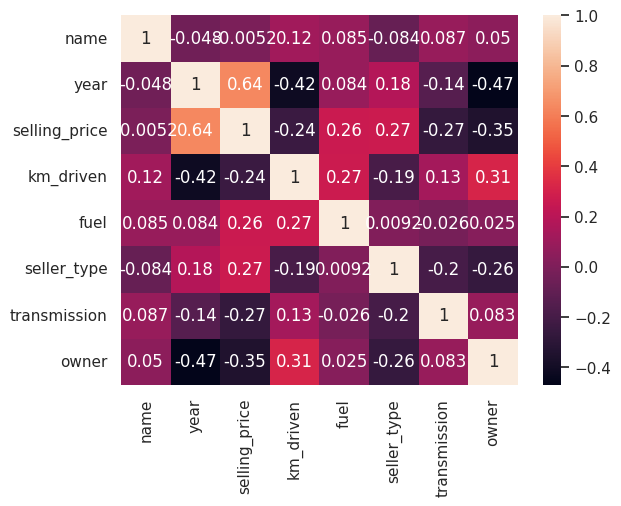

In [ ]:
plt.figure()
sns.heatmap(data.corr(), annot=True)

plt.show()

#visualize the pairwise correlations between the variables in a Pandas DataFrame

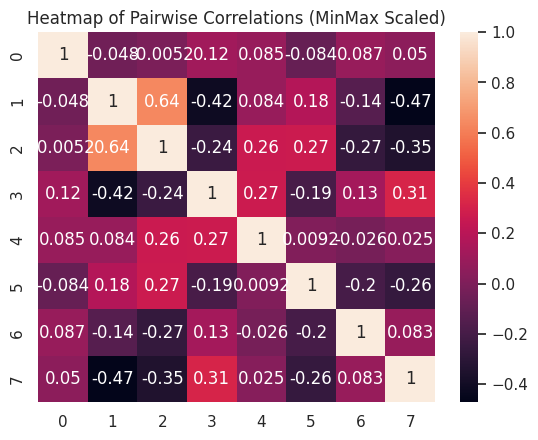

In [ ]:
scaler = MinMaxScaler()

data_scaled = scaler.fit_transform(data)
corr_matrix_scaled = pd.DataFrame(data_scaled).corr()

# Create a heatmap using the scaled correlation matrix
plt.figure()
sns.heatmap(corr_matrix_scaled, annot=True)
plt.title("Heatmap of Pairwise Correlations (MinMax Scaled)")
plt.show()

In [ ]:
import plotly
import plotly.graph_objects as go
import plotly.express as px
fig = px.pie(data,names='selling_price',title='Proportion Low, Medium, High car price',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

In [ ]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

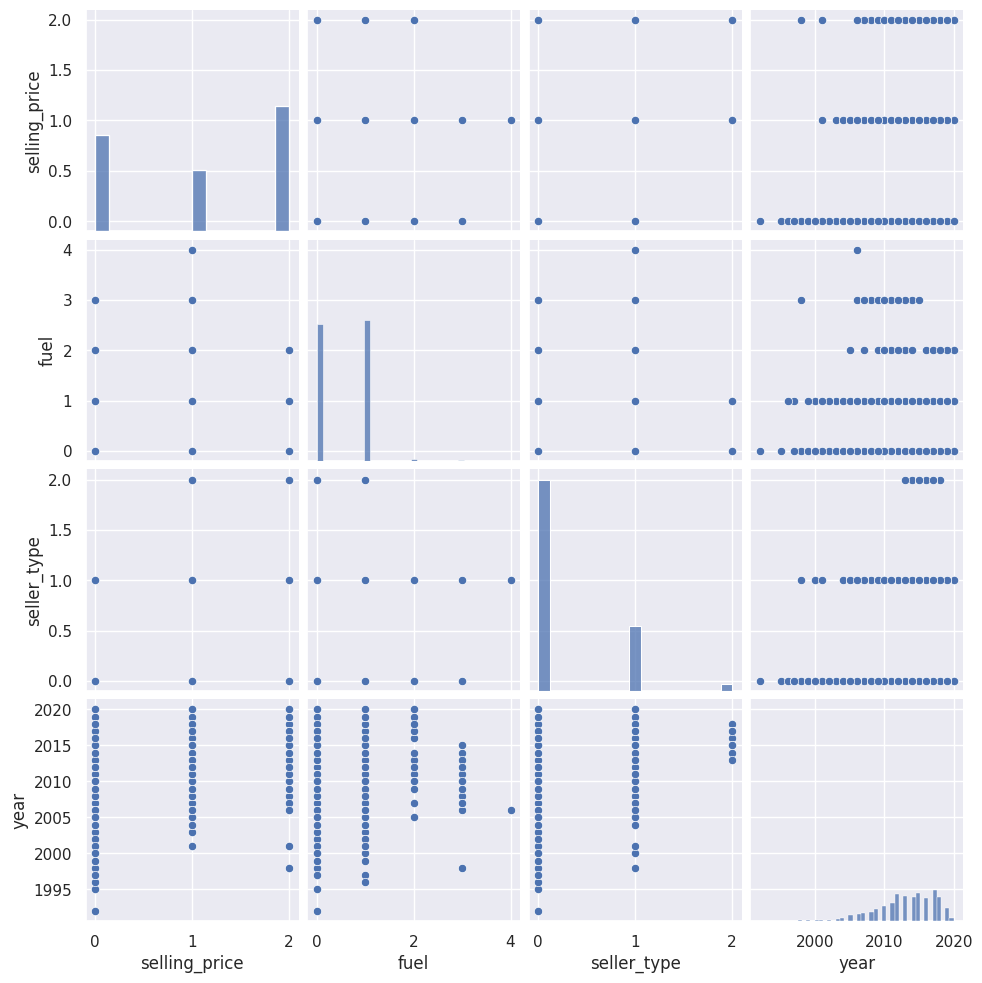

In [ ]:
#scatterplot
sns.set()
cols = ['selling_price', 'fuel', 'seller_type', 'year']
sns.pairplot(data[cols], height = 2.5)
plt.show()

In [ ]:
fig = px.bar(data, x='selling_price', y='year',title='Price Vs Year',color_discrete_sequence=px.colors.sequential.Turbo)
fig.show()

<Axes: title={'center': 'Label Distribution Before Oversampling'}>

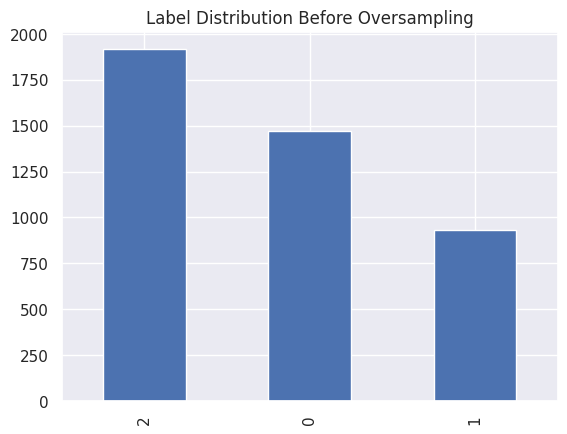

In [ ]:
data['selling_price'].value_counts().plot(kind='bar', title='Label Distribution Before Oversampling')

In [ ]:
#oversampling

class_0 = data[data['selling_price'] == 0]
class_1 = data[data['selling_price'] == 1]
class_2 = data[data['selling_price'] == 2]

<Axes: title={'center': 'Label Distribution after Oversampling'}>

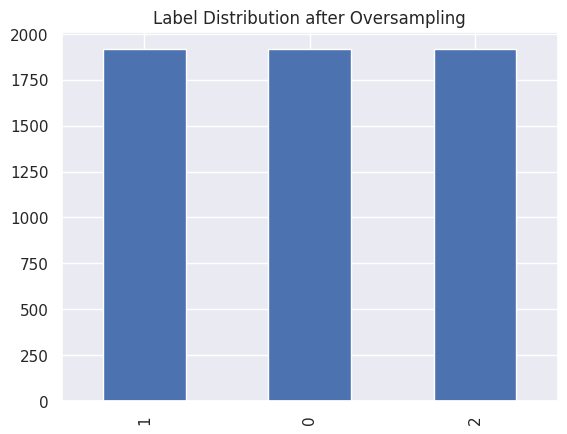

In [ ]:
class_1_over = class_1.sample(len(class_2), replace=True)
class_0_over = class_0.sample(len(class_2), replace=True)

df_new = pd.concat([class_1_over,class_0_over, class_2], axis=0)

df_new['selling_price'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')

In [ ]:
df_new['selling_price'].value_counts()

1    1916
0    1916
2    1916
Name: selling_price, dtype: int64

In [ ]:
df_new.head()

name  year  selling_price  km_driven  fuel  seller_type  transmission  \
1566   808  2018              1    25000.0     0            0             1   
1194   452  2017              1    10000.0     0            0             1   
3694  1321  2017              1    50000.0     0            0             1   
568   1171  2012              1    52000.0     1            1             1   
3354   401  2018              1    20000.0     0            0             1   

      owner  
1566      1  
1194      1  
3694      1  
568       1  
3354      1

In [ ]:
Y = data['selling_price']
X = data.drop(['name','transmission','owner','km_driven','selling_price'], axis = 1)
X

year  fuel  seller_type
0     2007     0            0
2     2012     1            0
3     2017     0            0
4     2014     1            0
5     2007     0            0
...    ...   ...          ...
4335  2014     1            0
4336  2014     1            0
4337  2009     0            0
4338  2016     1            0
4339  2016     0            0

[4315 rows x 3 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.64


# **Minmaxscaler**

In [ ]:
#Minmaxscaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
knn.fit(X_train_scaled, y_train)

#scoring on the scaled test set
print("MinMax Scaled test set accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

MinMax Scaled test set accuracy: 0.64


In [ ]:
#preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Standard test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Standard test accuracy: 0.68


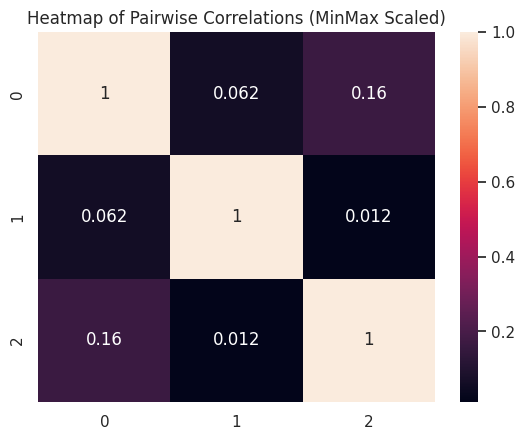

In [ ]:
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate the correlation matrix using the scaled data
corr_matrix = pd.DataFrame(X_train_scaled).corr()

# Create a heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True)
plt.title("Heatmap of Pairwise Correlations (MinMax Scaled)")
plt.show()

# **Train/Test split**

In [ ]:
Y = df_new['selling_price']
X = df_new.drop(['name','transmission','owner','km_driven','selling_price'], axis = 1)

X_features = data.columns

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
#X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)
accuracies = {}
print("Test set accuracy: {:.3f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.597


In [ ]:
predictions1 = knn.predict(X_test)
a1=accuracy_score(y_test, predictions1)
print(a1)
accuracies['KNN'] = a1

0.5965217391304348


In [ ]:
classificationreport = classification_report(y_test, predictions1)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.63      0.61      0.62       566
           1       0.49      0.58      0.53       607
           2       0.73      0.60      0.66       552

    accuracy                           0.60      1725
   macro avg       0.62      0.60      0.60      1725
weighted avg       0.61      0.60      0.60      1725



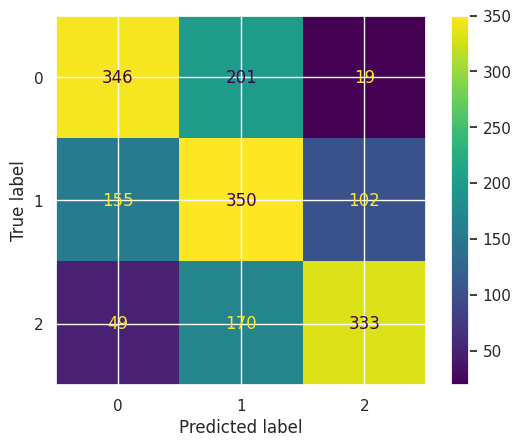

In [ ]:
cm = confusion_matrix(y_test, predictions1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
lr = LogisticRegression()  #Used when the target variable is categorical. Good for binary classification problems
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
predictions2 = lr.predict(X_test)
a2=accuracy_score(y_test, predictions2)
print(a2)
accuracies['Logistic Regression'] = a2

0.4579710144927536


In [ ]:
classificationreport = classification_report(y_test, predictions2)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.51      0.59      0.55       566
           1       0.00      0.00      0.00       607
           2       0.42      0.83      0.56       552

    accuracy                           0.46      1725
   macro avg       0.31      0.47      0.37      1725
weighted avg       0.30      0.46      0.36      1725



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



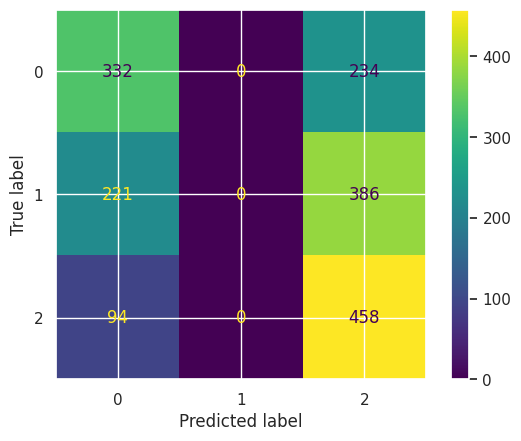

In [ ]:
cm = confusion_matrix(y_test, predictions2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.svm import SVC
mode = SVC()
mode.fit(X_train,y_train)

SVC()

In [ ]:
predictions3 = mode.predict(X_test)
a3=accuracy_score(y_test, predictions3)
print(a3)
accuracies['SVM'] = a3

0.32


In [ ]:
classificationreport = classification_report(y_test, predictions3)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       566
           1       0.00      0.00      0.00       607
           2       0.32      1.00      0.48       552

    accuracy                           0.32      1725
   macro avg       0.11      0.33      0.16      1725
weighted avg       0.10      0.32      0.16      1725



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



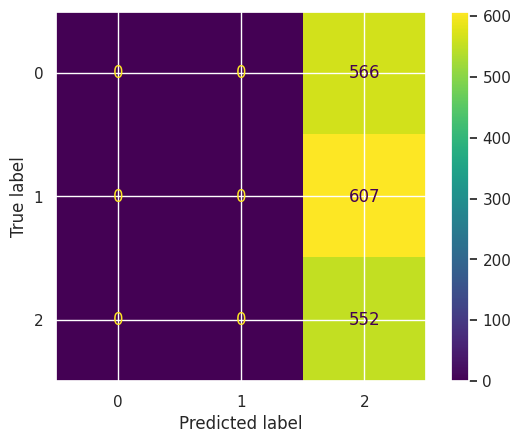

In [ ]:
cm = confusion_matrix(y_test, predictions3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
#Decission Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
predictions4 = clf.predict(X_test)
a4=accuracy_score(predictions4,y_test)
print(a4)
accuracies['Decision Tree'] = a4

0.648695652173913


In [ ]:
classificationreport = classification_report(y_test, predictions4)
print(classificationreport)

              precision    recall  f1-score   support

           0       0.73      0.66      0.70       566
           1       0.54      0.59      0.56       607
           2       0.70      0.70      0.70       552

    accuracy                           0.65      1725
   macro avg       0.66      0.65      0.65      1725
weighted avg       0.66      0.65      0.65      1725



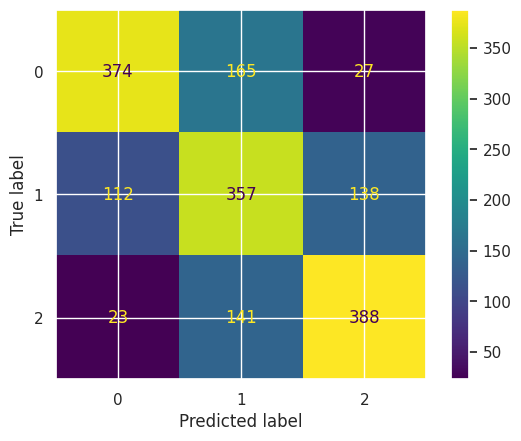

In [ ]:
cm = confusion_matrix(y_test, predictions4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=3000)
tree.plot_tree(clf,feature_names = X.columns, class_names=['1','2','3'],filled = True)

[Text(0.4894935344827586, 0.9545454545454546, 'year <= 2012.5\nentropy = 1.585\nsamples = 4023\nvalue = [1350, 1309, 1364]\nclass = 3'),
 Text(0.24515086206896552, 0.8636363636363636, 'year <= 2009.5\nentropy = 1.242\nsamples = 1707\nvalue = [1064, 502, 141]\nclass = 1'),
 Text(0.12176724137931035, 0.7727272727272727, 'fuel <= 0.5\nentropy = 0.754\nsamples = 752\nvalue = [632, 94, 26]\nclass = 1'),
 Text(0.07327586206896551, 0.6818181818181818, 'year <= 2008.5\nentropy = 0.411\nsamples = 520\nvalue = [485, 26, 9]\nclass = 1'),
 Text(0.05172413793103448, 0.5909090909090909, 'year <= 2001.5\nentropy = 0.28\nsamples = 429\nvalue = [412, 9, 8]\nclass = 1'),
 Text(0.034482758620689655, 0.5, 'year <= 2000.5\nentropy = 0.362\nsamples = 58\nvalue = [54, 0, 4]\nclass = 1'),
 Text(0.02586206896551724, 0.4090909090909091, 'year <= 1998.5\nentropy = 0.271\nsamples = 43\nvalue = [41, 0, 2]\nclass = 1'),
 Text(0.017241379310344827, 0.3181818181818182, 'year <= 1997.5\nentropy = 0.523\nsamples = 17\n

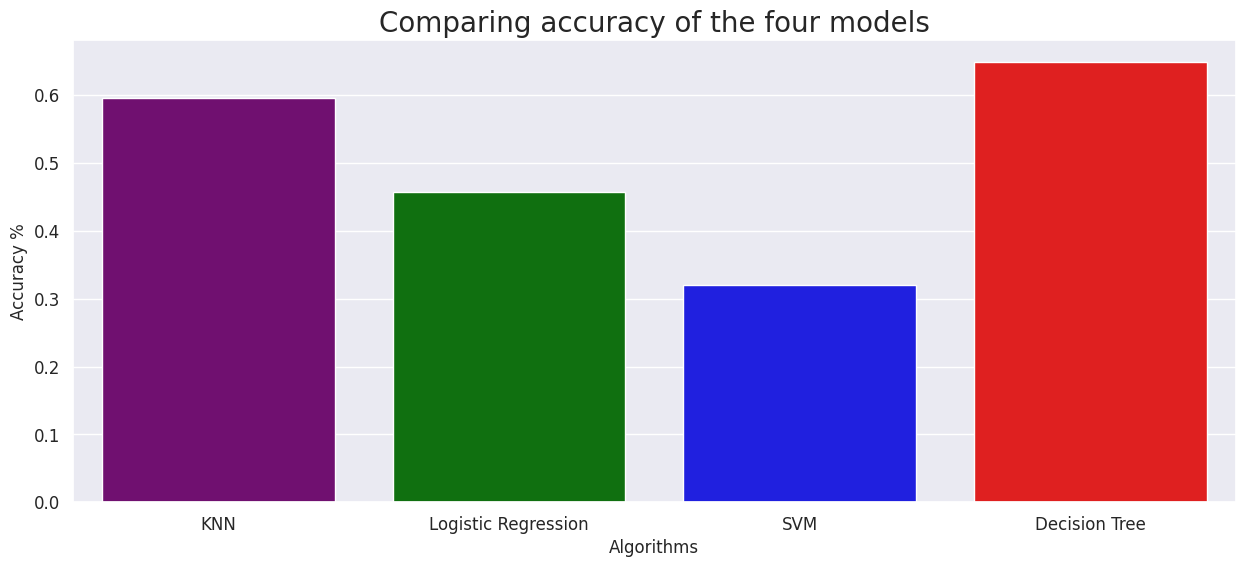

In [ ]:
colors = ["purple", "green", "blue", "red"]
plt.figure(figsize = (15,6))
plt.grid(True)
sns.set_style("whitegrid")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.title('Comparing accuracy of the four models', fontsize = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")


plt.show()

Model Testing

In [ ]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
